In [27]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

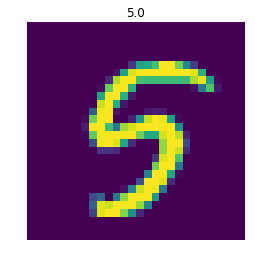

In [28]:
train = pd.read_csv(r"../input/train.csv",dtype = np.float32)

Y_numpy = train.label.values
X_numpy = train.loc[:,train.columns != "label"].values/255 
 
X_train, X_test, Y_train, Y_test = train_test_split(X_numpy, Y_numpy,test_size = 0.2) 

XTrain = torch.from_numpy(X_train)
YTrain = torch.from_numpy(Y_train).type(torch.LongTensor)

XTest = torch.from_numpy(X_test)
YTest = torch.from_numpy(Y_test).type(torch.LongTensor)

batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(XTrain,YTrain)
test = torch.utils.data.TensorDataset(XTest,YTest)


train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

plt.imshow(X_numpy[8].reshape(28,28))
plt.axis("off")
plt.title(str(Y_numpy[8]))
plt.savefig('graph.png')
plt.show()

In [29]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 28*28 
output_dim = 10  

model = LogisticRegressionModel(input_dim, output_dim)
  
error = nn.CrossEntropyLoss()
 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [30]:
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(train)
        
        loss = error(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:         
            correct = 0
            total = 0
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                outputs = model(test)
                
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.86973237991333  Accuracy: 68%
Iteration: 1000  Loss: 1.5050442218780518  Accuracy: 76%
Iteration: 1500  Loss: 1.3750364780426025  Accuracy: 79%
Iteration: 2000  Loss: 1.218716025352478  Accuracy: 80%
Iteration: 2500  Loss: 1.0909855365753174  Accuracy: 81%
Iteration: 3000  Loss: 0.9863776564598083  Accuracy: 81%
Iteration: 3500  Loss: 0.9253569841384888  Accuracy: 82%
Iteration: 4000  Loss: 0.9088683128356934  Accuracy: 83%
Iteration: 4500  Loss: 0.8909948468208313  Accuracy: 83%
Iteration: 5000  Loss: 0.8118694424629211  Accuracy: 83%
Iteration: 5500  Loss: 0.7352299690246582  Accuracy: 84%
Iteration: 6000  Loss: 0.7637999653816223  Accuracy: 84%
Iteration: 6500  Loss: 0.7227014899253845  Accuracy: 84%
Iteration: 7000  Loss: 0.8198594450950623  Accuracy: 85%
Iteration: 7500  Loss: 0.6505690217018127  Accuracy: 85%
Iteration: 8000  Loss: 0.6603313684463501  Accuracy: 85%
Iteration: 8500  Loss: 0.7357879877090454  Accuracy: 85%
Iteration: 9000  Loss: 0.7268255352

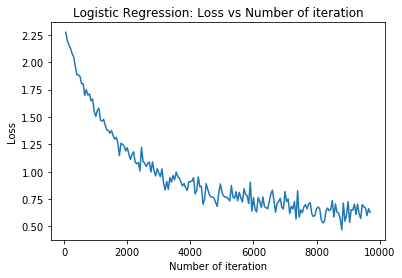

In [31]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

In [32]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

# CNN with 2 layers

In [33]:

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(XTrain,YTrain)
test = torch.utils.data.TensorDataset(XTest,YTest)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
model = CNNModel()
 
error = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [34]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.08814698457717896  Accuracy: 96 %
Iteration: 1000  Loss: 0.057710107415914536  Accuracy: 97 %
Iteration: 1500  Loss: 0.06281222403049469  Accuracy: 97 %
Iteration: 2000  Loss: 0.13655303418636322  Accuracy: 97 %


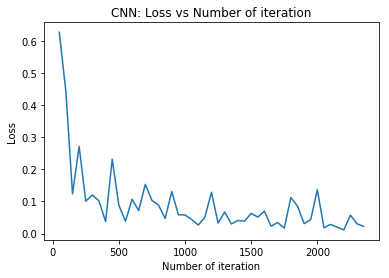

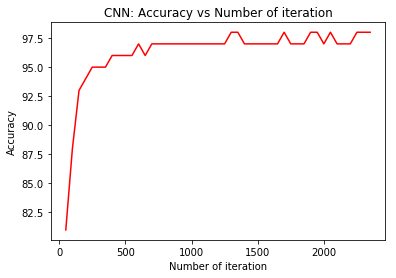

In [35]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [36]:
class CNNModelAlex(nn.Module):
    def __init__(self):
        super(CNNModelAlex, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
#         # Convolution 3
#         self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0)
#         self.relu3 = nn.ReLU()
        
#         # Convolution 4
#         self.cnn4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=0)
#         self.relu4 = nn.ReLU()
        
#         # Convolution 5
#         self.cnn5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=0)
#         self.relu5 = nn.ReLU()
        
#         # Max pool 3
#         self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(3136, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
#         # Convolution 3 
#         out = self.cnn3(out)
#         out = self.relu3(out)
        
#         # Convolution 4 
#         out = self.cnn4(out)
#         out = self.relu4(out)
        
#         #Convolution 5
#         out = self.cnn5(out)
#         out = self.relu5(out)
        
#         # Max pool 3 
#         out = self.maxpool3(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(XTrain,YTrain)
test = torch.utils.data.TensorDataset(XTest,YTest)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
modelA = CNNModelAlex()
 
error = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(modelA.parameters(), lr=learning_rate)


In [37]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = modelA(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.1028149425983429  Accuracy: 98 %
Iteration: 1000  Loss: 0.07053442299365997  Accuracy: 98 %
Iteration: 1500  Loss: 0.04590601846575737  Accuracy: 98 %
Iteration: 2000  Loss: 0.10191576927900314  Accuracy: 98 %


In [38]:
test_df = pd.read_csv(r"../input/test.csv",dtype = np.float32)

In [39]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
test_df = test_df.values/255
test_df = torch.from_numpy(test_df)

In [41]:
test_df.shape

torch.Size([28000, 784])

In [42]:
sample = pd.read_csv(r"../input/sample_submission.csv",dtype = np.float32)

In [43]:
sample.head()

,ImageId,Label
0,1.0,0.0
1,2.0,0.0
2,3.0,0.0
3,4.0,0.0
4,5.0,0.0


In [44]:
s_numpy = sample.Label.values

In [45]:
targetstest = torch.from_numpy(s_numpy).type(torch.LongTensor)
test = torch.utils.data.TensorDataset(test_df,targetstest)

In [46]:
test_loader = DataLoader(test, batch_size = 100, shuffle = False)

In [47]:
def prediciton(data_loader):
    model.eval()
    test_pred = torch.LongTensor()
    
    for i, (data,label) in enumerate(data_loader):
        data = Variable(data, volatile=True)
        if torch.cuda.is_available():
            data = data.cuda()
            
        output = model(data)
        
        pred = output.cpu().data.max(1, keepdim=True)[1]
        test_pred = torch.cat((test_pred, pred), dim=0)
        
    return test_pred

In [48]:
test_pred = prediciton(test_loader)

In [50]:
out_df = pd.DataFrame(np.c_[np.arange(1, len(test_dataset)+1)[:,None], test_pred.numpy()], columns=['ImageId', 'Label'])
out_df.to_csv('submission.csv', index=False)